In [1]:
!pip install -q torch
!pip install -q torchvision
!pip install -q numpy
!pip install -q pandas
!pip install -q tensorflow
!pip install -q matplotlib
!pip install -q scikit-learn

### Performing PCA and SVMs

Files already downloaded and verified
Files already downloaded and verified


C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM Accuracy: 0.559


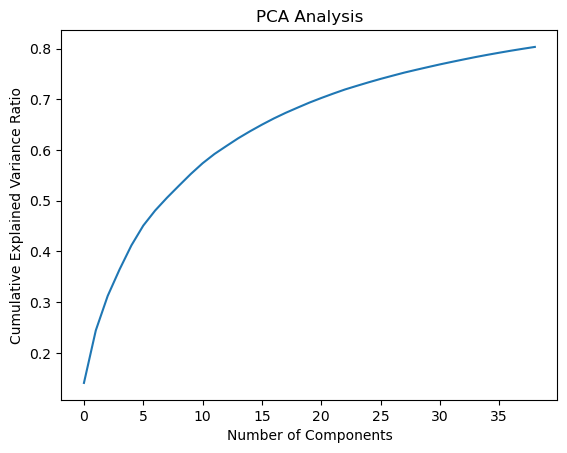

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load CIFAR-100 dataset for 25 classes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Select 25 out of 100 classes
selected_classes = list(range(20))

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainset.targets = np.array(trainset.targets)
trainset.data = trainset.data[trainset.targets < 20][:40000]  # Select first 40,000 images
trainset.targets = trainset.targets[trainset.targets < 20][:40000]

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testset.targets = np.array(testset.targets)
testset.data = testset.data[testset.targets < 20][:10000]  # Select first 10,000 images
testset.targets = testset.targets[testset.targets < 20][:10000]

# Step 2: Create DataLoader for batch processing with multiple workers
batch_size = 64
num_workers = 4  # Adjust this based on your CPU capacity
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Step 3: Load pretrained ResNet model
resnet = torchvision.models.resnet18(pretrained=True)
# Remove the last fully connected layer
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))

# Step 4: Extract features using ResNet in batches
def extract_features(dataloader, model):
    features = []
    labels = []
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            features.append(outputs.squeeze().numpy())
            labels.append(targets.numpy())
    return np.concatenate(features), np.concatenate(labels)

X_train_features, y_train = extract_features(trainloader, resnet)
X_test_features, y_test = extract_features(testloader, resnet)

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=0.8)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# Step 6: Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Step 7: Predict and evaluate
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()


Files already downloaded and verified
Files already downloaded and verified


C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM Accuracy: 0.583


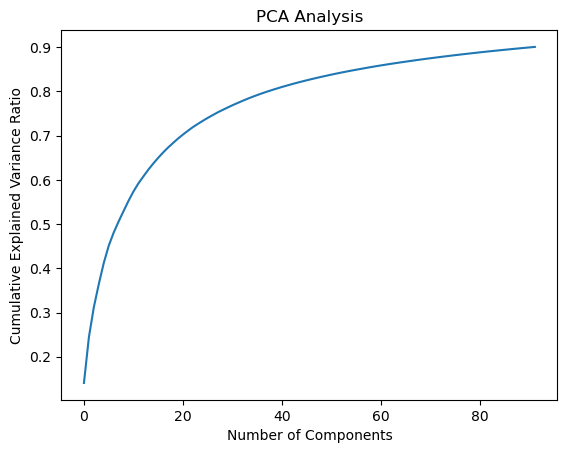

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load CIFAR-100 dataset for 25 classes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Select 25 out of 100 classes
selected_classes = list(range(20))

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainset.targets = np.array(trainset.targets)
trainset.data = trainset.data[trainset.targets < 20][:40000]  # Select first 40,000 images
trainset.targets = trainset.targets[trainset.targets < 20][:40000]

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testset.targets = np.array(testset.targets)
testset.data = testset.data[testset.targets < 20][:10000]  # Select first 10,000 images
testset.targets = testset.targets[testset.targets < 20][:10000]

# Step 2: Create DataLoader for batch processing with multiple workers
batch_size = 64
num_workers = 4  # Adjust this based on your CPU capacity
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Step 3: Load pretrained ResNet model
resnet = torchvision.models.resnet18(pretrained=True)
# Remove the last fully connected layer
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))

# Step 4: Extract features using ResNet in batches
def extract_features(dataloader, model):
    features = []
    labels = []
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            features.append(outputs.squeeze().numpy())
            labels.append(targets.numpy())
    return np.concatenate(features), np.concatenate(labels)

X_train_features, y_train = extract_features(trainloader, resnet)
X_test_features, y_test = extract_features(testloader, resnet)

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# Step 6: Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Step 7: Predict and evaluate
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()


### Utilizing feature extraction from resnet to improve svm accuracy

Files already downloaded and verified
Files already downloaded and verified


C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM Accuracy: 0.3176


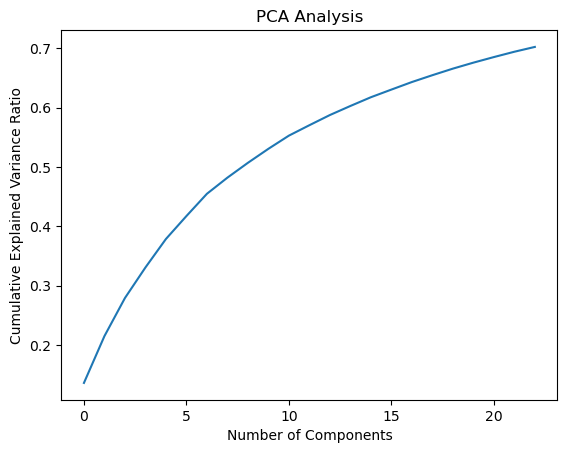

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Step 2: Create DataLoader for batch processing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 3: Load pretrained ResNet model
resnet = torchvision.models.resnet18(pretrained=True)
# Remove the last fully connected layer
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))

# Step 4: Extract features using ResNet
def extract_features(dataloader, model):
    features = []
    labels = []
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            features.append(outputs.squeeze().numpy())
            labels.append(targets.numpy())
    return np.concatenate(features), np.concatenate(labels)

X_train_features, y_train = extract_features(trainloader, resnet)
X_test_features, y_test = extract_features(testloader, resnet)

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=0.7)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# Step 6: Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Step 7: Predict and evaluate
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()

Files already downloaded and verified
Files already downloaded and verified


C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM Accuracy: 0.556


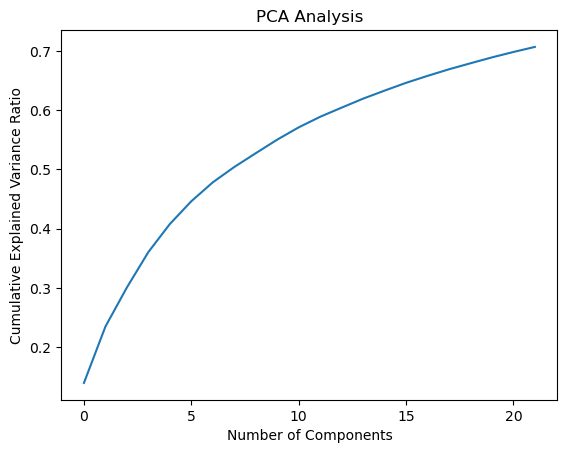

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load CIFAR-100 dataset for 25 classes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Select 25 out of 100 classes
selected_classes = list(range(20))

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainset.targets = np.array(trainset.targets)
trainset.data = trainset.data[trainset.targets < 20][:40000]  # Select first 40,000 images
trainset.targets = trainset.targets[trainset.targets < 20][:40000]

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testset.targets = np.array(testset.targets)
testset.data = testset.data[testset.targets < 20][:10000]  # Select first 10,000 images
testset.targets = testset.targets[testset.targets < 20][:10000]

# Step 2: Create DataLoader for batch processing with multiple workers
batch_size = 64
num_workers = 4  # Adjust this based on your CPU capacity
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Step 3: Load pretrained ResNet model
resnet = torchvision.models.resnet18(pretrained=True)
# Remove the last fully connected layer
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))

# Step 4: Extract features using ResNet in batches
def extract_features(dataloader, model):
    features = []
    labels = []
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            features.append(outputs.squeeze().numpy())
            labels.append(targets.numpy())
    return np.concatenate(features), np.concatenate(labels)

X_train_features, y_train = extract_features(trainloader, resnet)
X_test_features, y_test = extract_features(testloader, resnet)

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=0.7)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# Step 6: Train SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)

# Step 7: Predict and evaluate
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()


### Comparing Accuracy versus PCA ratio

Files already downloaded and verified
Files already downloaded and verified


C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PCA value: 0.7, SVM Accuracy: 0.5625
PCA value: 0.72, SVM Accuracy: 0.575
PCA value: 0.74, SVM Accuracy: 0.5795
PCA value: 0.75, SVM Accuracy: 0.582
PCA value: 0.78, SVM Accuracy: 0.593
PCA value: 0.8, SVM Accuracy: 0.6025
PCA value: 0.82, SVM Accuracy: 0.599
PCA value: 0.84, SVM Accuracy: 0.604
PCA value: 0.86, SVM Accuracy: 0.608
PCA value: 0.88, SVM Accuracy: 0.614
PCA value: 0.9, SVM Accuracy: 0.612
PCA value: 0.92, SVM Accuracy: 0.618
PCA value: 0.95, SVM Accuracy: 0.6225


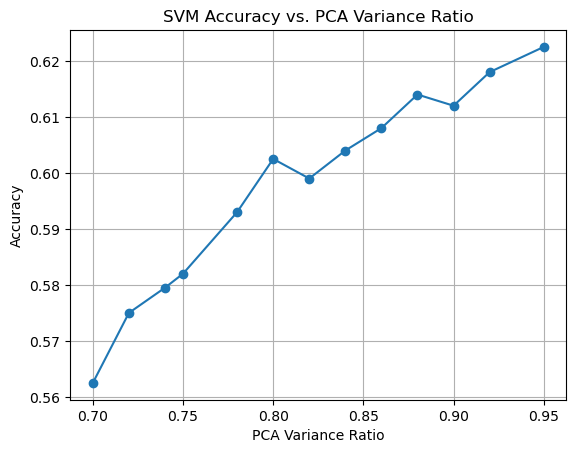

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load CIFAR-100 dataset for 25 classes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Select 25 out of 100 classes
selected_classes = list(range(20))

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainset.targets = np.array(trainset.targets)
trainset.data = trainset.data[trainset.targets < 20][:40000]  # Select first 40,000 images
trainset.targets = trainset.targets[trainset.targets < 20][:40000]

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testset.targets = np.array(testset.targets)
testset.data = testset.data[testset.targets < 20][:10000]  # Select first 10,000 images
testset.targets = testset.targets[testset.targets < 20][:10000]

# Step 2: Create DataLoader for batch processing with multiple workers
batch_size = 64
num_workers = 4  # Adjust this based on your CPU capacity
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Step 3: Load pretrained ResNet model
resnet = torchvision.models.resnet18(pretrained=True)
# Remove the last fully connected layer
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))

# Step 4: Extract features using ResNet in batches
def extract_features(dataloader, model):
    features = []
    labels = []
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            features.append(outputs.squeeze().numpy())
            labels.append(targets.numpy())
    return np.concatenate(features), np.concatenate(labels)

X_train_features, y_train = extract_features(trainloader, resnet)
X_test_features, y_test = extract_features(testloader, resnet)

# Step 5: Define a range of PCA values to test
pca_values = [0.7,0.72,0.74,0.75,0.78,0.8,0.82,0.84,0.86,0.88, 0.9,0.92,0.95]

# Create empty lists to store results
accuracies = []
svm_models = []

# Iterate over PCA values
for pca_value in pca_values:
    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=pca_value)
    X_train_pca = pca.fit_transform(X_train_features)
    X_test_pca = pca.transform(X_test_features)

    # Train SVM classifier
    svm = SVC(kernel='rbf')
    svm.fit(X_train_pca, y_train)
    
    # Store the trained model
    svm_models.append(svm)

    # Predict and evaluate
    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"PCA value: {pca_value}, SVM Accuracy: {accuracy}")

# Plot the accuracies for different PCA values
plt.plot(pca_values, accuracies, marker='o')
plt.xlabel('PCA Variance Ratio')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. PCA Variance Ratio')
plt.grid(True)
plt.show()


### Logistic Regression

Files already downloaded and verified
Files already downloaded and verified


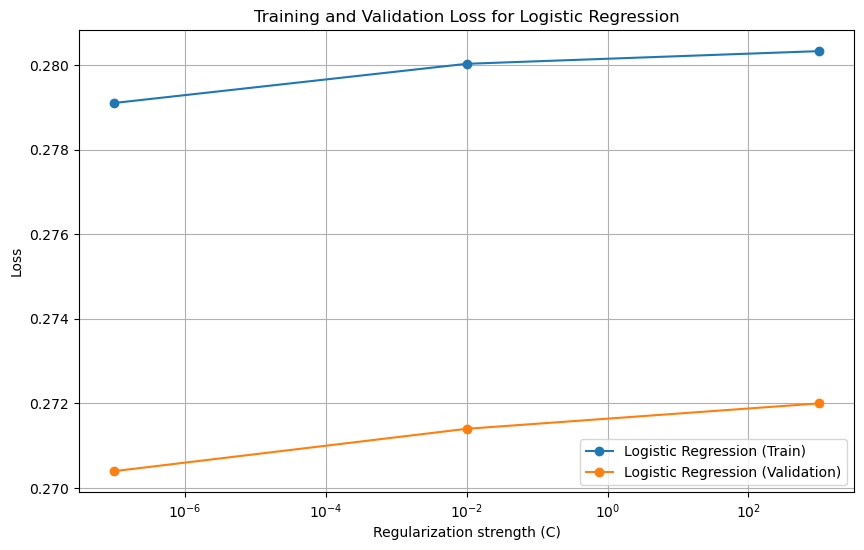

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load CIFAR-100 dataset for 20 superclasses
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Step 2: Select 20 superclasses and corresponding labels
selected_superclasses = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]

# Mapping of superclass names to their corresponding indices
superclass_to_index = {superclass: index for index, superclass in enumerate(selected_superclasses)}

# Select images and labels corresponding to the selected superclasses
selected_train_indices = [index for index, label in enumerate(trainset.targets) if label in superclass_to_index.values()]
selected_train_data = [trainset.data[i] for i in selected_train_indices]
selected_train_labels = [trainset.targets[i] for i in selected_train_indices]

selected_test_indices = [index for index, label in enumerate(testset.targets) if label in superclass_to_index.values()]
selected_test_data = [testset.data[i] for i in selected_test_indices]
selected_test_labels = [testset.targets[i] for i in selected_test_indices]

# Step 3: Flatten images and concatenate superclass labels as features
selected_train_data_flat = np.array(selected_train_data).reshape(len(selected_train_data), -1)
selected_train_labels_array = np.array(selected_train_labels).reshape(-1, 1)
selected_train_features = np.hstack((selected_train_data_flat, selected_train_labels_array))

selected_test_data_flat = np.array(selected_test_data).reshape(len(selected_test_data), -1)
selected_test_labels_array = np.array(selected_test_labels).reshape(-1, 1)
selected_test_features = np.hstack((selected_test_data_flat, selected_test_labels_array))

# Step 4: Split the dataset into training and testing sets
train_size = 48000
test_size = 12000

X_train = selected_train_features[:train_size, :-1]
y_train = selected_train_features[:train_size, -1]

X_test = selected_test_features[:test_size, :-1]
y_test = selected_test_features[:test_size, -1]

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=0.7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 6: Train logistic regression classifier
logistic_regression = LogisticRegression(max_iter=1000)
param_range = np.logspace(-7, 3, 3)
train_scores, valid_scores = validation_curve(logistic_regression, X_train_pca, y_train, param_name="C", param_range=param_range, cv=5)
train_loss_lr = np.mean(train_scores, axis=1)
valid_loss_lr = np.mean(valid_scores, axis=1)

# Step 7: Plot training set loss vs validation set loss
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_loss_lr, label='Logistic Regression (Train)', marker='o')
plt.plot(param_range, valid_loss_lr, label='Logistic Regression (Validation)', marker='o')
plt.title('Training and Validation Loss for Logistic Regression')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


### Training and Validation Accuracy

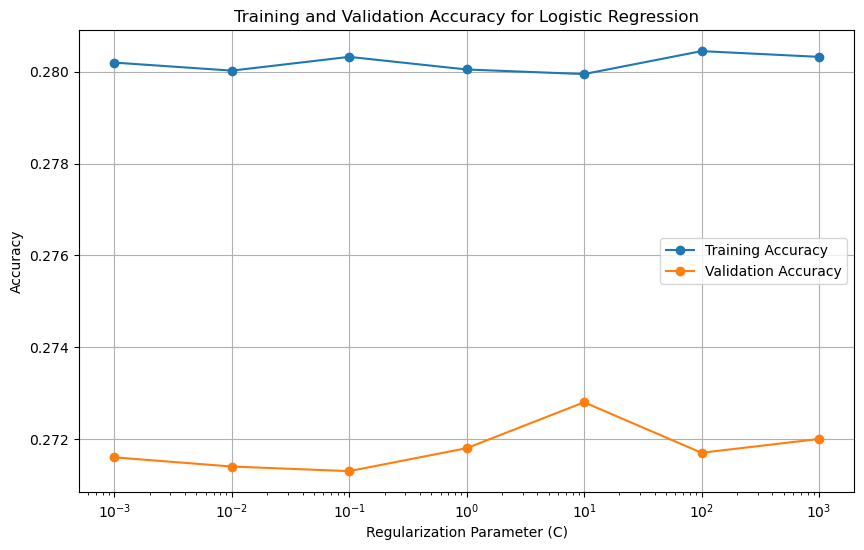

In [3]:
from sklearn.linear_model import LogisticRegression

# Step 11: Train Logistic Regression classifier
logreg = LogisticRegression(max_iter=5000)
param_range = np.logspace(-3, 3, 7)
train_scores, valid_scores = validation_curve(logreg, X_train_pca, y_train, param_name="C", param_range=param_range, cv=5)
train_acc_logreg = np.mean(train_scores, axis=1)
valid_acc_logreg = np.mean(valid_scores, axis=1)

# Step 12: Plot training set accuracy vs validation set accuracy for Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_acc_logreg, label='Training Accuracy', marker='o')
plt.plot(param_range, valid_acc_logreg, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy for Logistic Regression')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from sklearn.metrics import accuracy_score

# Train the logistic regression model
logreg.fit(X_train_pca, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.279


### Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
confusion_matrix(y_test, y_pred)

array([[57, 11,  3,  1,  2,  2,  9,  2,  0,  4,  3,  4,  0,  0,  0,  0,
         1,  0,  0,  1],
       [ 5, 53,  5,  3,  2,  3,  3,  0,  1,  1,  0,  5,  3,  5,  4,  0,
         0,  0,  6,  1],
       [10,  9, 32,  0,  0, 10,  3,  0,  6,  5,  4, 10,  0,  5,  2,  1,
         0,  0,  0,  3],
       [ 1,  2,  2, 22, 14,  1,  2, 15,  7,  5,  3,  0,  4,  2,  5,  3,
         2,  2,  5,  3],
       [ 0,  8,  2, 10, 21,  3,  5,  9,  2,  6,  1,  3,  3,  4, 12,  1,
         3,  0,  6,  1],
       [10,  3, 11,  1,  1, 27,  4,  2,  1,  4,  3,  4,  4,  5,  0,  3,
         4, 11,  0,  2],
       [ 8,  3,  6,  5,  0,  2, 30, 11,  2,  7,  3,  3,  1,  2,  8,  5,
         0,  1,  3,  0],
       [ 2,  1,  0,  6,  7,  1, 16, 31,  3,  5,  1,  0,  0,  3,  8,  3,
         3,  1,  8,  1],
       [ 1,  4,  4,  5,  4,  7,  1,  1, 16,  3,  4,  2, 13,  6,  0,  5,
         1, 12,  4,  7],
       [ 6,  4,  1,  2,  2,  2,  6,  5,  2, 33,  3,  6,  5,  1,  1,  2,
         7,  5,  3,  4],
       [16, 18, 11,  4,  2,  6

### LR, SVM and Kernel SVM with Cross validation - 5 fold - Accuracy Comparison

In [10]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Train logistic regression with L2 regularization and cross-validation
logreg_model = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='lbfgs', max_iter=10000)
logreg_model.fit(X_train_pca, y_train)

# Perform cross-validation
cv_scores = cross_val_score(logreg_model, X_train_pca, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

# Calculate accuracy on the test set
test_accuracy = logreg_model.score(X_test_pca, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.2635 0.277  0.2735 0.277  0.2675]
Mean accuracy: 0.27170000000000005
Test set accuracy: 0.28


In [12]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Train logistic regression with L2 regularization and cross-validation
logreg_model = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear', max_iter=10000)
logreg_model.fit(X_train_pca, y_train)

# Perform cross-validation
cv_scores = cross_val_score(logreg_model, X_train_pca, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

# Calculate accuracy on the test set
test_accuracy = logreg_model.score(X_test_pca, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.218  0.2165 0.216  0.2335 0.2135]
Mean accuracy: 0.21949999999999997
Test set accuracy: 0.2415


In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# Train Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_pca, y_train)

# Calculate accuracy on the test set
test_accuracy_qda = qda_model.score(X_test_pca, y_test)
print("Test set accuracy (QDA):", test_accuracy_qda)

# Train Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_pca, y_train)

# Calculate accuracy on the test set
test_accuracy_lda = lda_model.score(X_test_pca, y_test)
print("Test set accuracy (LDA):", test_accuracy_lda)

Test set accuracy (QDA): 0.3355
Test set accuracy (LDA): 0.278


In [2]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_pca, y_train)
# Calculate accuracies
train_accuracy_svm = accuracy_score(y_train, svm_linear.predict(X_train_pca))
valid_accuracy_svm = accuracy_score(y_test, svm_linear.predict(X_test_pca))

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_pca, y_train)
# Calculate accuracies
train_accuracy_svm1 = accuracy_score(y_train, svm_rbf.predict(X_train_pca))
valid_accuracy_svm1 = accuracy_score(y_test, svm_rbf.predict(X_test_pca))




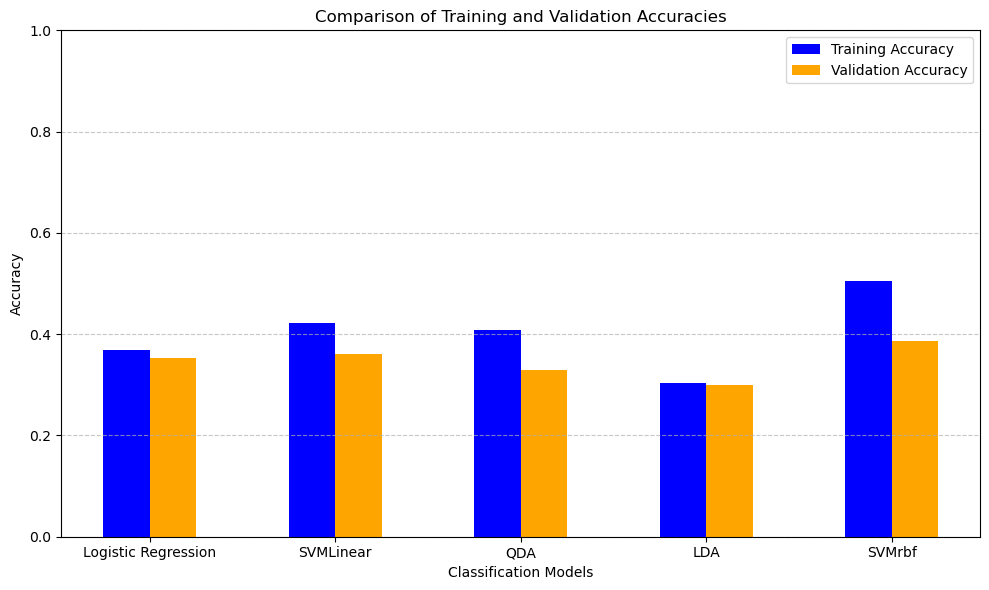

In [3]:
# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'SVMLinear', 'QDA', 'LDA','SVMrbf']
train_accuracies = [train_accuracy_logistic, train_accuracy_svm, train_accuracy_qda, train_accuracy_lda, train_accuracy_svm1]
valid_accuracies = [valid_accuracy_logistic, valid_accuracy_svm, valid_accuracy_qda, valid_accuracy_lda,valid_accuracy_svm1]
bar_width = 0.25
indices = np.arange(len(models))

plt.bar(indices, train_accuracies, bar_width, label='Training Accuracy', color='blue')
plt.bar(indices + bar_width, valid_accuracies, bar_width, label='Validation Accuracy', color='orange')

plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Validation Accuracies')
plt.xticks(indices + bar_width / 2, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

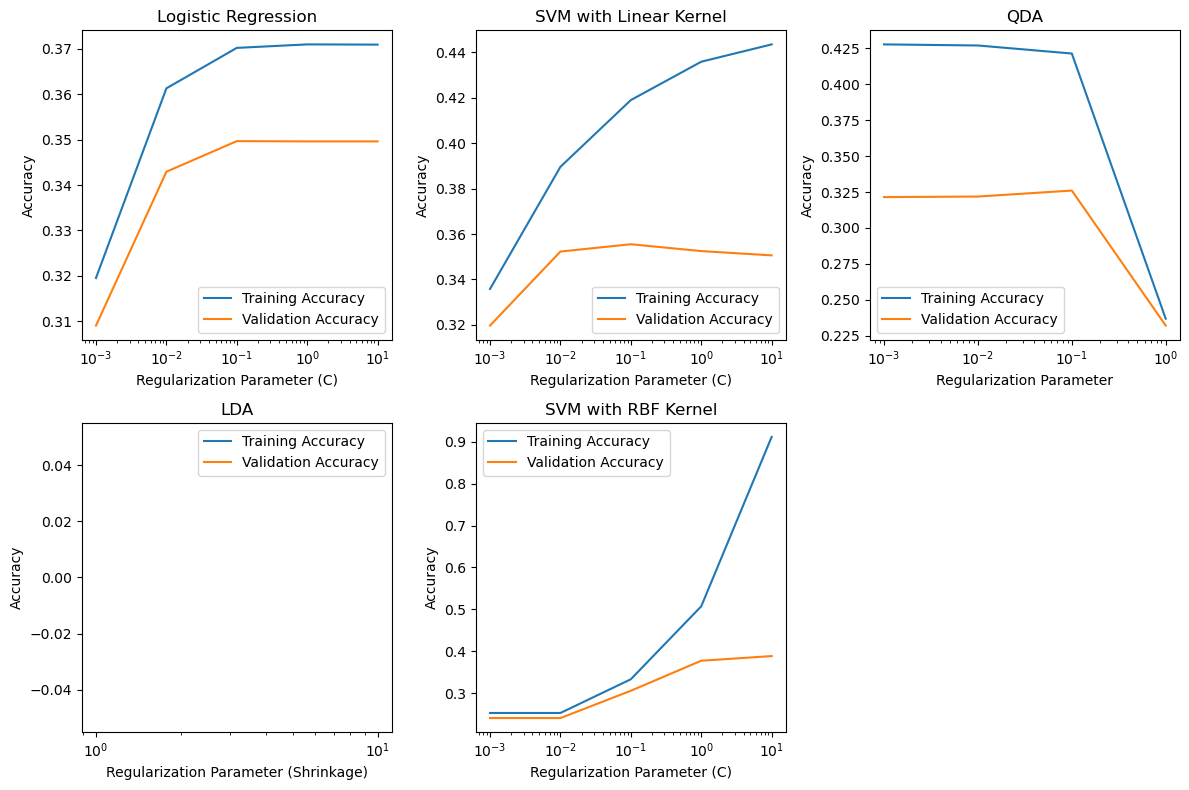

In [4]:
# Set up the range of regularization parameters
param_range = [0.001, 0.01, 0.1, 1, 10]

# Regularization for Logistic Regression
train_scores_logistic, valid_scores_logistic = validation_curve(
    LogisticRegression(max_iter=1000), X_train_pca, y_train, param_name='C', param_range=param_range, cv=5)

# Regularization for SVM with linear kernel
train_scores_svm, valid_scores_svm = validation_curve(
    SVC(kernel='linear'), X_train_pca, y_train, param_name='C', param_range=param_range, cv=5)

# Regularization for QDA
train_scores_qda, valid_scores_qda = validation_curve(
    QuadraticDiscriminantAnalysis(), X_train_pca, y_train, param_name='reg_param', param_range=param_range, cv=5)

# Regularization for LDA
train_scores_lda, valid_scores_lda = validation_curve(
    LinearDiscriminantAnalysis(), X_train_pca, y_train, param_name='shrinkage', param_range=param_range, cv=5)

# Regularization for SVM with RBF kernel
train_scores_svm_rbf, valid_scores_svm_rbf = validation_curve(
    SVC(kernel='rbf'), X_train_pca, y_train, param_name='C', param_range=param_range, cv=5)

# Plotting the validation curves
plt.figure(figsize=(12, 8))

# Logistic Regression
plt.subplot(2, 3, 1)
plt.plot(param_range, np.mean(train_scores_logistic, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores_logistic, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.legend()

# SVM with Linear Kernel
plt.subplot(2, 3, 2)
plt.plot(param_range, np.mean(train_scores_svm, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores_svm, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('SVM with Linear Kernel')
plt.legend()

# QDA
plt.subplot(2, 3, 3)
plt.plot(param_range, np.mean(train_scores_qda, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores_qda, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')
plt.title('QDA')
plt.legend()

# LDA
plt.subplot(2, 3, 4)
plt.plot(param_range, np.mean(train_scores_lda, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores_lda, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter (Shrinkage)')
plt.ylabel('Accuracy')
plt.title('LDA')
plt.legend()

# SVM with RBF Kernel
plt.subplot(2, 3, 5)
plt.plot(param_range, np.mean(train_scores_svm_rbf, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores_svm_rbf, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('SVM with RBF Kernel')
plt.legend()

plt.tight_layout()
plt.show()


### Random Forest

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-100 dataset for 20 superclasses
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Select 20 superclasses and corresponding labels
selected_superclasses = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]

# Mapping of superclass names to their corresponding indices
superclass_to_index = {superclass: index for index, superclass in enumerate(selected_superclasses)}

# Select images and labels corresponding to the selected superclasses
selected_train_indices = [index for index, label in enumerate(trainset.targets) if label in superclass_to_index.values()]
selected_train_data = [trainset.data[i] for i in selected_train_indices]
selected_train_labels = [trainset.targets[i] for i in selected_train_indices]

selected_test_indices = [index for index, label in enumerate(testset.targets) if label in superclass_to_index.values()]
selected_test_data = [testset.data[i] for i in selected_test_indices]
selected_test_labels = [testset.targets[i] for i in selected_test_indices]

# Flatten images
X_train = np.array(selected_train_data).reshape(len(selected_train_data), -1)
y_train = np.array(selected_train_labels)

X_test = np.array(selected_test_data).reshape(len(selected_test_data), -1)
y_test = np.array(selected_test_labels)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Files already downloaded and verified
Files already downloaded and verified
Training Accuracy: 1.0
Test Accuracy: 0.397
